# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 3 conflicts.


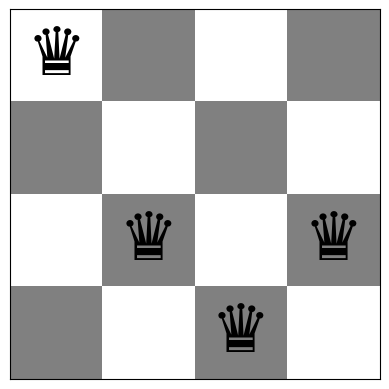

Queens (left to right) are at rows: [0 2 3 2]
Number of conflicts: 3


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


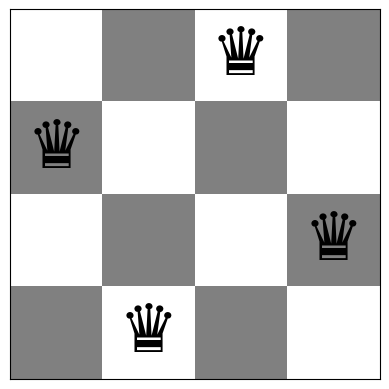

In [ ]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [ ]:
# Code and description go here
def steepest_ascent_hill_climbing(n, max_steps=1000, verbose=True):

    # 1. Khoi tao board ngau nhien
    board = random_board(n)
    current_conf = conflicts(board)

    if verbose:
        print(f"Initial board with {current_conf} conflicts")

    steps = 0
    while steps < max_steps:
        steps += 1

        # 2. Xet tat ca local moves
        best_move = None
        best_conf = current_conf  # giu nguyen conflict nhieu nhat

        for col in range(n):  # duyet qua tung cot
            current_row = board[col]
            for row in range(n):  # duyet qua tung hang
                if row != current_row:  # kiem tra move phai khac vi tri hien tai
                    new_board = board.copy() # dung copy de tao board moi va su dung ham conflicts() de tinh conflict
                    new_board[col] = row
                    new_conf = conflicts(new_board)

                    # 3. neu move tot hon thi cap nhat lai
                    if new_conf < best_conf:
                        best_conf = new_conf
                        best_move = (col, row)

        # 4. kiem tra move co cai thien tot hon
        if best_move is None:
            # khong cai thien duoc thi ngung
            if verbose:
                print(f"Reached local optimum with {current_conf} conflicts at step {steps}.")
            break

        # 5. thuc hien move tot nhat
        col, row = best_move
        board[col] = row
        current_conf = best_conf

        if verbose:
            print(f"Step {steps}: moved queen in column {col} to row {row}, conflicts = {current_conf}")

        # 6. giai duoc thi xuat ket qua
        if current_conf == 0:
            if verbose:
                print(f"Found solution at step {steps}!")
            break

    return board, steps, current_conf


Initial board with 8 conflicts
Step 1: moved queen in column 1 to row 1, conflicts = 5
Step 2: moved queen in column 6 to row 1, conflicts = 3
Step 3: moved queen in column 5 to row 3, conflicts = 2
Step 4: moved queen in column 3 to row 7, conflicts = 1
Step 5: moved queen in column 1 to row 2, conflicts = 0
Found solution at step 5!
Board with 0 conflicts.


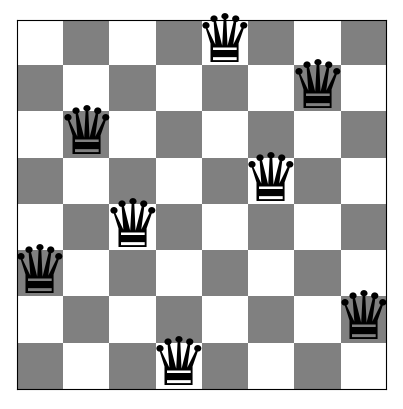

In [ ]:
# Goi ham
board, steps, conf = steepest_ascent_hill_climbing(8, max_steps=500)
show_board(board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [ ]:
# Code and description go here
import random

def stochastic_hill_climbing(n, max_steps=1000, verbose=True):

    # khoi tao board ngau nhien
    board = random_board(n)
    current_conf = conflicts(board)

    if verbose:
        print(f"Initial board with {current_conf} conflicts")

    steps = 0
    while steps < max_steps:
        steps += 1
        improving_moves = []

        # tim tat ca move cai thien
        for col in range(n):
            current_row = board[col]
            for row in range(n):
                if row != current_row:
                    new_board = board.copy()
                    new_board[col] = row
                    new_conf = conflicts(new_board)
                    if new_conf < current_conf:
                        improving_moves.append((col, row, new_conf))

        # neu move khong con cai thien duoc nua thi ngung
        if not improving_moves:
            if verbose:
                print(f"Reached local optimum with {current_conf} conflicts at step {steps}.")
            break

        #chon nhien mot move trong cac move tot
        col, row, new_conf = random.choice(improving_moves)
        board[col] = row
        current_conf = new_conf

        if verbose:
            print(f"Step {steps}: moved queen in column {col} to row {row}, conflicts = {current_conf}")

        #neu tim duoc solution thi xuat ket qua
        if current_conf == 0:
            if verbose:
                print(f"Found solution at step {steps}!")
            break

    return board, steps, current_conf

Initial board with 8 conflicts
Step 1: moved queen in column 5 to row 3, conflicts = 7
Step 2: moved queen in column 2 to row 5, conflicts = 6
Step 3: moved queen in column 2 to row 1, conflicts = 5
Step 4: moved queen in column 4 to row 1, conflicts = 4
Step 5: moved queen in column 2 to row 0, conflicts = 3
Step 6: moved queen in column 5 to row 7, conflicts = 1
Step 7: moved queen in column 1 to row 6, conflicts = 0
Found solution at step 7!
Board with 0 conflicts.


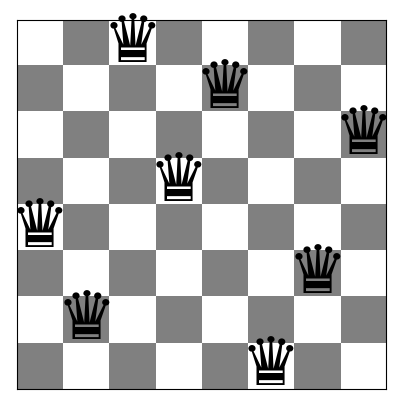

In [ ]:
# Goi ham
board, steps, conf =  stochastic_hill_climbing(8, max_steps=500)
show_board(board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [ ]:
# Code and description go here
def stochastic_hill_climbing_first_choice(n, max_steps=1000, max_tries=100, verbose=True):

    # khoi tao borad ngau nhien
    board = random_board(n)
    current_conf = conflicts(board)

    if verbose:
        print(f"Initial board with {current_conf} conflicts")

    steps = 0
    no_improve = 0

    while steps < max_steps and current_conf > 0:
        steps += 1

        # chọn ngau nhien 1 local move
        col = np.random.randint(0, n)
        row = np.random.randint(0, n)
        while row == board[col]:  # khac vi tri hien tai
            row = np.random.randint(0, n)

        new_board = board.copy()
        new_board[col] = row
        new_conf = conflicts(new_board)

        if new_conf < current_conf:
            # move
            board = new_board
            current_conf = new_conf
            no_improve = 0  # reset bo dem no_improve
            if verbose:
                print(f"Step {steps}: moved queen in column {col} to row {row}, conflicts = {current_conf}")
        else:
            # khong cai thien duoc thi tang len 1 lan
            no_improve += 1

        if no_improve >= max_tries:
            # neu bo dem vuot muc max_tries thi thong bao nhung
            if verbose:
                print(f"Stopped after {steps} steps due to no improvement in {max_tries} tries.")
            break
            #neu tim duoc solution thi xuat ket qua
    if current_conf == 0 and verbose:
        print(f"Found solution at step {steps}!")

    return board, steps, current_conf


Initial board with 10 conflicts
Step 1: moved queen in column 6 to row 5, conflicts = 8
Step 3: moved queen in column 2 to row 2, conflicts = 7
Step 4: moved queen in column 3 to row 0, conflicts = 5
Step 7: moved queen in column 5 to row 4, conflicts = 4
Step 9: moved queen in column 6 to row 0, conflicts = 3
Step 29: moved queen in column 0 to row 2, conflicts = 2
Step 96: moved queen in column 0 to row 1, conflicts = 1
Step 102: moved queen in column 3 to row 5, conflicts = 0
Found solution at step 102!
Board with 0 conflicts.


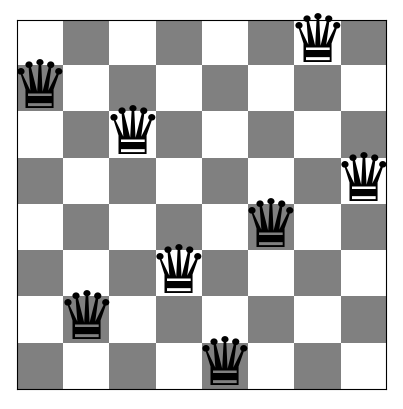

In [ ]:
# Goi ham
board, steps, conf =  stochastic_hill_climbing_first_choice(8, max_steps=500)
show_board(board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [ ]:
# Code and description go here
def hill_climbing_with_random_restarts(hill_climbing_func, n, restarts=100, max_steps=1000, verbose=False):

    best_board = None
    best_conf = float("inf")
    best_steps = None

    for i in range(restarts):
        board, steps, conf = hill_climbing_func(n, max_steps=max_steps, verbose=False)

        if verbose:
            print(f"Restart {i+1}: conflicts = {conf}")

        if conf < best_conf:
            best_conf = conf
            best_board = board
            best_steps = steps

        # neu tim duoc conflict tot nhat = 0 thi xuat ket qua
        if best_conf == 0:
            if verbose:
                print(f"Found solution at restart {i+1}!")
            break

    return best_board, best_steps, best_conf

In [ ]:
# Goi ham voi steepest_ascent_hill_climbing
best_board, best_steps, best_conf = hill_climbing_with_random_restarts(
    steepest_ascent_hill_climbing, n=8, restarts=100, verbose=True
)
print("Best board:", best_board)
print("Conflicts:", best_conf)

Restart 1: conflicts = 1
Restart 2: conflicts = 2
Restart 3: conflicts = 2
Restart 4: conflicts = 1
Restart 5: conflicts = 1
Restart 6: conflicts = 1
Restart 7: conflicts = 1
Restart 8: conflicts = 1
Restart 9: conflicts = 1
Restart 10: conflicts = 2
Restart 11: conflicts = 1
Restart 12: conflicts = 2
Restart 13: conflicts = 1
Restart 14: conflicts = 2
Restart 15: conflicts = 1
Restart 16: conflicts = 1
Restart 17: conflicts = 0
Found solution at restart 17!
Best board: [3 7 0 2 5 1 6 4]
Conflicts: 0


In [ ]:
# Goi ham voi stochastic_hill_climbing
best_board, best_steps, best_conf = hill_climbing_with_random_restarts(
    stochastic_hill_climbing, n=8, restarts=100, verbose=True
)
print("Best board:", best_board)
print("Conflicts:", best_conf)

Restart 1: conflicts = 1
Restart 2: conflicts = 2
Restart 3: conflicts = 1
Restart 4: conflicts = 1
Restart 5: conflicts = 1
Restart 6: conflicts = 1
Restart 7: conflicts = 1
Restart 8: conflicts = 1
Restart 9: conflicts = 0
Found solution at restart 9!
Best board: [3 1 6 4 0 7 5 2]
Conflicts: 0


In [ ]:
# Goi ham voi stochastic_hill_climbing_first_choice
best_board, best_steps, best_conf = hill_climbing_with_random_restarts(
    stochastic_hill_climbing_first_choice, n=8, restarts=100, verbose=True
)
print("Best board:", best_board)
print("Conflicts:", best_conf)

Restart 1: conflicts = 1
Restart 2: conflicts = 1
Restart 3: conflicts = 3
Restart 4: conflicts = 1
Restart 5: conflicts = 2
Restart 6: conflicts = 2
Restart 7: conflicts = 2
Restart 8: conflicts = 1
Restart 9: conflicts = 2
Restart 10: conflicts = 2
Restart 11: conflicts = 2
Restart 12: conflicts = 1
Restart 13: conflicts = 1
Restart 14: conflicts = 2
Restart 15: conflicts = 3
Restart 16: conflicts = 1
Restart 17: conflicts = 1
Restart 18: conflicts = 2
Restart 19: conflicts = 1
Restart 20: conflicts = 1
Restart 21: conflicts = 2
Restart 22: conflicts = 2
Restart 23: conflicts = 1
Restart 24: conflicts = 0
Found solution at restart 24!
Best board: [0 4 7 5 2 6 1 3]
Conflicts: 0


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Start with 7 conflicts
Found solution at step 1983
Best board: [2 6 1 7 4 0 3 5]
Conflicts: 0


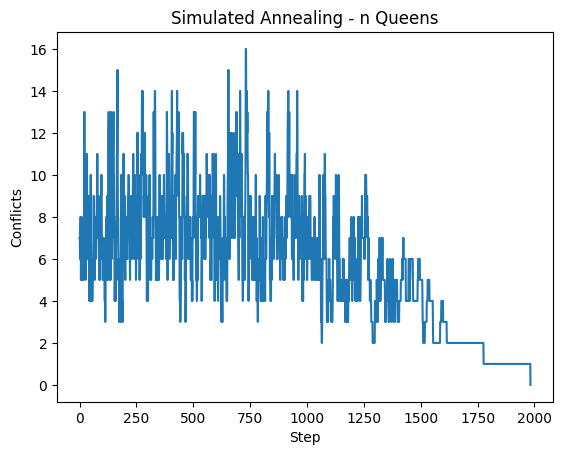

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(n, max_steps=10000, T_start=1000, alpha=0.995, verbose=False):

    # khoi tao board ngau nhien
    board = random_board(n)
    current_conf = conflicts(board)
    T = T_start
    history = [current_conf]

    if verbose:
        print("Start with", current_conf, "conflicts")

    for step in range(max_steps):
        if current_conf == 0:
            if verbose:
                print("Found solution at step", step)
            break

        # chon 1 neighbor ngau nhien
        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == board[col]:
            row = random.randint(0, n-1)

        new_board = board.copy()
        new_board[col] = row
        new_conf = conflicts(new_board)

        delta = new_conf - current_conf

        # dieu kien chap nhan
        if delta <= 0 or random.random() < math.exp(-delta / T):
            board = new_board
            current_conf = new_conf

        # giam nhiet do
        T = T * alpha
        history.append(current_conf)

    return board, step, history


# run voi n=8
n = 8
board, steps, history = simulated_annealing(n, verbose=True)

print("Best board:", board)
print("Conflicts:", conflicts(board))

# ve bieu do
plt.plot(history)
plt.xlabel("Step")
plt.ylabel("Conflicts")
plt.title("Simulated Annealing - n Queens")
plt.show()

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [ ]:
import time
import numpy as np

def evaluate_algorithm(algorithm, n, runs=100, **kwargs):
    runtimes = []
    conflicts_list = []
    success = 0

    for _ in range(runs):
        start = time.time()
        board, steps, history = algorithm(n, verbose=False, **kwargs)  # tắt in ra
        end = time.time()

        conf = conflicts(board)
        conflicts_list.append(conf)
        runtimes.append(end - start)
        if conf == 0:
            success += 1

    # tinh avg time, conflict, success rate
    avg_time = np.mean(runtimes)
    avg_conf = np.mean(conflicts_list)
    success_rate = success / runs * 100

    return avg_time, avg_conf, success_rate


results = []

algorithms = [
    ("Steepest asc. HC", steepest_ascent_hill_climbing),
    ("Stochastic HC 1", stochastic_hill_climbing),
    ("Stochastic HC 2", stochastic_hill_climbing_first_choice),
    ("Simulated Annealing", simulated_annealing)
]

# thu voi n=4 va n=8
for n in [4, 8]:
    for name, algo in algorithms:
        avg_runtime, avg_conflicts, success_rate = evaluate_algorithm(algo, n, runs=100)
        results.append({
            "Algorithm": name,
            "Board size": n,
            "Avg. Run time": round(avg_runtime, 5),
            "Avg. Conflicts": round(avg_conflicts, 2),
            "% of runs ending in optimal solution ": round(success_rate, 2)
        })

# Đưa vào DataFrame
df_results = pd.DataFrame(results)

# Hiển thị bảng kết quả
print(df_results)
df_results

             Algorithm  Board size  Avg. Run time  Avg. Conflicts  \
0     Steepest asc. HC           4        0.00024            0.71   
1      Stochastic HC 1           4        0.00027            0.75   
2      Stochastic HC 2           4        0.00117            0.84   
3  Simulated Annealing           4        0.00430            0.00   
4     Steepest asc. HC           8        0.00500            1.23   
5      Stochastic HC 1           8        0.00395            1.29   
6      Stochastic HC 2           8        0.00289            1.47   
7  Simulated Annealing           8        0.03208            0.03   

   % of runs ending in optimal solution   
0                                   40.0  
1                                   44.0  
2                                   35.0  
3                                  100.0  
4                                   10.0  
5                                   18.0  
6                                    9.0  
7                                 

,Algorithm,Board size,Avg. Run time,Avg. Conflicts,% of runs ending in optimal solution
0,Steepest asc. HC,4,0.00024,0.71,40.0
1,Stochastic HC 1,4,0.00027,0.75,44.0
2,Stochastic HC 2,4,0.00117,0.84,35.0
3,Simulated Annealing,4,0.00430,0.00,100.0
4,Steepest asc. HC,8,0.00500,1.23,10.0
5,Stochastic HC 1,8,0.00395,1.29,18.0
6,Stochastic HC 2,8,0.00289,1.47,9.0
7,Simulated Annealing,8,0.03208,0.03,97.0


### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

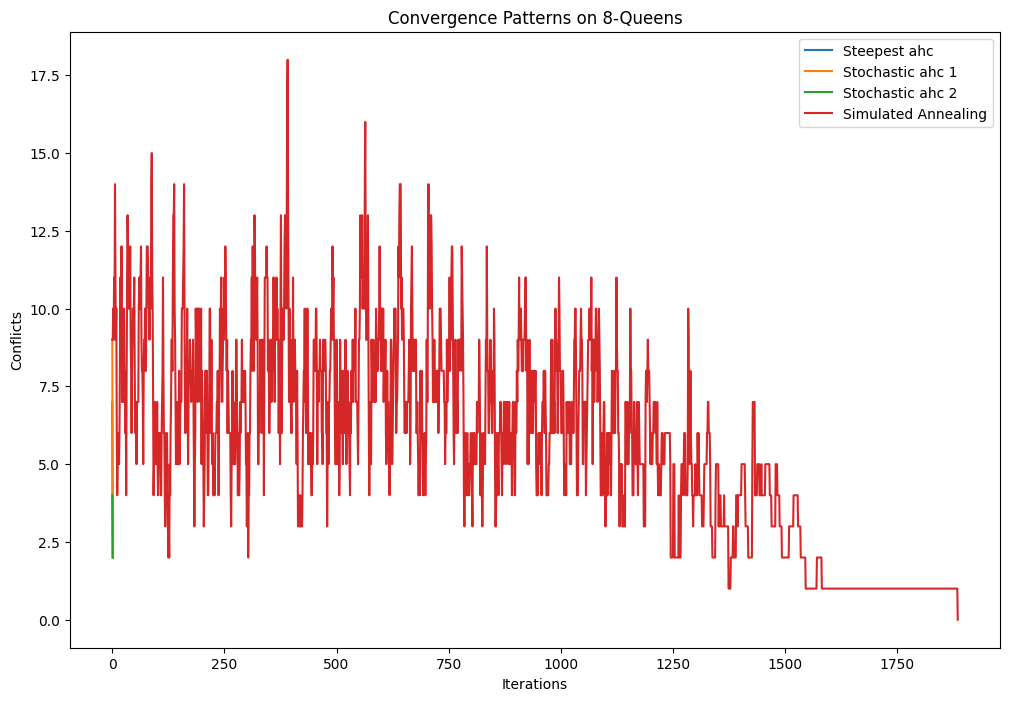

In [ ]:
# Code and description go here
import matplotlib.pyplot as plt

def plot_convergence(n=8):
    algorithms = [
        ("Steepest ahc", steepest_ascent_hill_climbing),
        ("Stochastic ahc 1", stochastic_hill_climbing),
        ("Stochastic ahc 2", stochastic_hill_climbing_first_choice),
        ("Simulated Annealing", simulated_annealing)
    ]

    plt.figure(figsize=(12, 8))

    for name, algo in algorithms:
        if name == "Simulated Annealing":
            board, steps, history = algo(n, verbose=False)
        else:
            # lưu conflicts sau mỗi step
            history = []
            board = random_board(n)
            current_conf = conflicts(board)
            history.append(current_conf)

            for _ in range(1000):  # gioi han
                if current_conf == 0:
                    break
                # goi lai
                if name == "Steepest ahc":
                    board, steps, current_conf = steepest_ascent_hill_climbing(n, verbose=False)
                elif name == "Stochastic ahc 1":
                    board, steps, current_conf = stochastic_hill_climbing(n, verbose=False)
                elif name == "Stochastic ahc 2":
                    board, steps, current_conf = stochastic_hill_climbing_first_choice(n, verbose=False)
                history.append(current_conf)
                break

        plt.plot(history, label=name)

    plt.xlabel("Iterations")
    plt.ylabel("Conflicts")
    plt.title(f"Convergence Patterns on {n}-Queens")
    plt.legend()
    plt.show()

plot_convergence(8)


### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

Steepest   n= 4 runs=200 avg_time=0.00054s std=0.00068s
Steepest   n= 8 runs=100 avg_time=0.00670s std=0.00259s
Steepest   n=12 runs= 40 avg_time=0.04543s std=0.02967s
Steepest   n=16 runs= 20 avg_time=0.06290s std=0.02014s
Steepest   n=20 runs= 10 avg_time=0.09726s std=0.01867s
==> Steepest: estimated exponent (slope) = 3.329 => empirical O(n^3.329)

FirstChoice n= 4 runs=200 avg_time=0.00951s std=0.00787s
FirstChoice n= 8 runs=100 avg_time=0.01943s std=0.00801s
FirstChoice n=12 runs= 40 avg_time=0.02803s std=0.00468s
FirstChoice n=16 runs= 20 avg_time=0.03900s std=0.00789s
FirstChoice n=20 runs= 10 avg_time=0.05827s std=0.01066s
==> FirstChoice: estimated exponent (slope) = 1.083 => empirical O(n^1.083)


Summary table (avg_time in seconds):


Algorithm,FirstChoice,Steepest
n,,
4,0.009513,0.000544
8,0.019428,0.006700
12,0.028031,0.045431
16,0.038997,0.062902
20,0.058267,0.097265


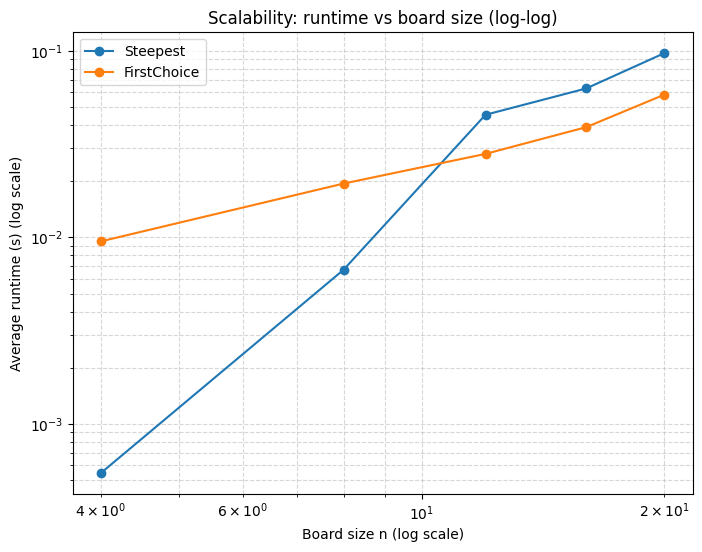

Detailed fits (power law):
Steepest    : avg_time ≈ 6.492e-06 * n^3.329
FirstChoice : avg_time ≈ 2.048e-03 * n^1.083


In [ ]:
# Code and description go here

import time
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def time_single_run(algorithm, n, **kwargs):

    start = time.time()

    out = algorithm(n, verbose=False, **kwargs)
    end = time.time()
    return end - start

def average_runtime(algorithm, n, runs=20, **kwargs):
    times = []
    for _ in range(runs):
        t = time_single_run(algorithm, n, **kwargs)
        times.append(t)
    return float(np.mean(times)), float(np.std(times))


runs_per_n = {4: 200, 8: 100, 12: 40, 16: 20, 20: 10}

algorithms = [
    ("Steepest", steepest_ascent_hill_climbing),            # chon task 1
    ("FirstChoice", stochastic_hill_climbing_first_choice)  # chon task 3
]

results = []
ns = [4, 8, 12, 16, 20]

for name, func in algorithms:
    avg_times = []
    std_times = []
    for n in ns:
        runs = runs_per_n.get(n, 10)

        if name == "Steepest": # task 1
            avg, std = average_runtime(func, n, runs=runs, max_steps=10000)
        else:
            # task 3-First-choice, cho maxt step=10000 va max tries=1000
            avg, std = average_runtime(func, n, runs=runs, max_steps=10000, max_tries=1000)
        avg_times.append(avg)
        std_times.append(std)
        # lưu row tạm
        results.append({"Algorithm": name, "n": n, "avg_time": avg, "std_time": std})
        print(f"{name:10s} n={n:2d} runs={runs:3d} avg_time={avg:.5f}s std={std:.5f}s")

    # sau moi algorithm, truyen power law vao log-log
    x = np.log(ns)
    y = np.log(np.array(avg_times) + 1e-12)  # add tiny to avoid log(0)
    slope, intercept = np.polyfit(x, y, 1)   # y = slope * log(n) + intercept
    # slope is exponent: avg_time ≈ exp(intercept) * n^slope
    print(f"==> {name}: estimated exponent (slope) = {slope:.3f} => empirical O(n^{slope:.3f})")
    print()

# Build DataFrame for all rows
df = pd.DataFrame(results)
# Pivot for plotting
pivot = df.pivot(index="n", columns="Algorithm", values="avg_time")
print("\nSummary table (avg_time in seconds):")
display(df.pivot_table(index="n", columns="Algorithm", values="avg_time"))

# Plot log-log
plt.figure(figsize=(8,6))
for name, func in algorithms:
    times = df[df["Algorithm"]==name].sort_values("n")["avg_time"].values
    plt.plot(ns, times, marker='o', label=name)
# log-log scale
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Board size n (log scale)")
plt.ylabel("Average runtime (s) (log scale)")
plt.title("Scalability: runtime vs board size (log-log)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# Fit power-law lines for each algorithm and print detailed fit
print("Detailed fits (power law):")
for name, func in algorithms:
    times = df[df["Algorithm"]==name].sort_values("n")["avg_time"].values
    slope, intercept = np.polyfit(np.log(ns), np.log(np.array(times)+1e-12), 1)
    c = math.exp(intercept)
    print(f"{name:12s}: avg_time ≈ {c:.3e} * n^{slope:.3f}")


## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [ ]:
# Code and description go here

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

In [ ]:
# Code and description go here